## Determine the rectange of the ROI

**The purpose of this code is to determine the rectangle size of the ROI. This, at future, should be done automatically by the YOLO or the detection algorithm, for now and to advance in the state machine, manually the rectlange ROI will be selected, and this progroma get the coordinates of that ROI**


In [1]:
import cv2
import numpy as np
import settings as glb #this import all the global variables
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
glb.init()

In [3]:
#function that display a unique image
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (5,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:

# Create a function based on a CV2 Event (Left button click)

# mouse callback function
def draw_rectangle(event,x,y,flags,param):

    global pt1,pt2,topLeft_clicked,botRight_clicked

    # get mouse click
    if event == cv2.EVENT_LBUTTONDOWN:

        if topLeft_clicked == True and botRight_clicked == True:
            topLeft_clicked = False
            botRight_clicked = False
            pt1 = (0,0)
            pt2 = (0,0)

        if topLeft_clicked == False:
            pt1 = (x,y)
            topLeft_clicked = True
            
        elif botRight_clicked == False:
            pt2 = (x,y)
            botRight_clicked = True

        
# Haven't drawn anything yet!

pt1 = (0,0)
pt2 = (0,0)
topLeft_clicked = False
botRight_clicked = False

cap = cv2.VideoCapture(0) 

# Create a named window for connections
cv2.namedWindow('Test')

# Bind draw_rectangle function to mouse cliks
cv2.setMouseCallback('Test', draw_rectangle) 


while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if topLeft_clicked:
        cv2.circle(frame, center=pt1, radius=5, color=(0,0,255), thickness=-1)
        
    #drawing rectangle
    if topLeft_clicked and botRight_clicked:
        cv2.rectangle(frame, pt1, pt2, (0, 0, 255), 1)
        
        
        
    # Display the resulting frame
    cv2.imshow('Test', frame)

    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(pt1, pt2)
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

(216, 328) (363, 391)


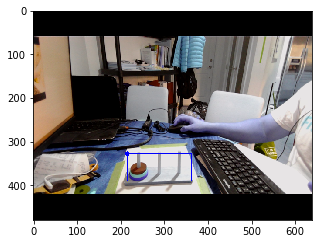

In [5]:
newframe = frame.copy()
display(newframe)

In [6]:
cap.release()
cv2.destroyAllWindows()

In [7]:
total_width = pt2[0] - pt1[0]

In [8]:
total_height = pt2[1] - pt1[1]

In [9]:
total_width

147

In [10]:
hanoi_roi= newframe[pt1[1]:pt2[1], pt1[0]:pt2[0]]

In [11]:
imagehsv = cv2.cvtColor(hanoi_roi, cv2.COLOR_BGR2HSV)

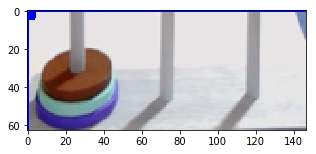

In [12]:
display(hanoi_roi)

In [13]:
width_section = int(total_width/3)

In [14]:
image2 = hanoi_roi

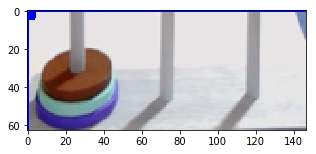

In [15]:
display(image2)

In [16]:
#from previuos test, with 15 width pixels for the detection zone is good
mask_x = int(total_width*(0.15))  # the initial point of the stick position, then, is added the sticks offset (x,y) coordinates
mask_y = int(total_height *(0.2))  #inital point 
mask_width = 15  #width by pixels, for now it is stated as a fixed value... for now....
mask_height = int(total_height *(0.70))  #height by pixels


In [17]:
stick_position_dict = {'stick0' : 0, 'stick1': int(total_width*(0.25)), 'stick2' : int(total_width*(0.6))}
sort_disc_dictionary = {'sort0' : None, 'sort1': None, 'sort2': None}

In [18]:
stick_position_dict

{'stick0': 0, 'stick1': 36, 'stick2': 88}

In [19]:
mask_x

22

In [20]:
mask_y

12

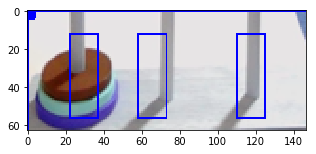

In [21]:
for i in range (0, 3):
    cv2.rectangle(hanoi_roi, ((mask_x + stick_position_dict['stick'+str(i)]), mask_y), ((mask_x + stick_position_dict['stick'+str(i)]+mask_width), mask_y+mask_height), (0,0,255), thickness = 1)


display(hanoi_roi)  